In [1]:
import pandas as pd

google = pd.read_csv("D:/NUS/NUS Sem 2/WDM/Lecture Notes/final project/reviews.csv")

google.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name
0,Shall we date?WizardessHeart+,"February 26, 2018",3,14,This game is good and the story was interestin...,Nur Aisha
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian
4,Shall we date?WizardessHeart+,"February 26, 2018",3,14,This game is good and the story was interestin...,Nur Aisha


In [2]:
#removing the reviews with 3 star rating
google_valid = google[-(google.Rating==3)]

google_valid.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian
5,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton
6,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman


In [3]:
#Sentiment Analysis to find out polrity scores
from textblob import TextBlob
reviews = TextBlob(google_valid.loc[1, 'Review_Text'])

reviews.sentiment.polarity

0.10664682539682538

In [6]:
#to suppress warnings
import warnings
warnings.filterwarnings("ignore")

#creating a function which returns polarity score for input text
def detect_sentiment(text):
    
    blob = TextBlob(text)
    
    return blob.sentiment.polarity

google_valid.Review_Text = google_valid.Review_Text.apply(str)

google_valid['sentiment'] = google_valid.Review_Text.apply(detect_sentiment)

google_valid.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name,sentiment
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian,-0.076786
5,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647
6,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333


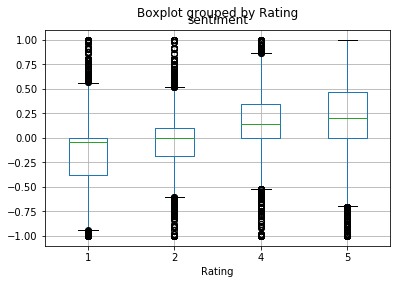

In [8]:
google_valid.boxplot('sentiment',by='Rating')

In [9]:
#storing the character length of reviews
google_valid['length'] = google_valid.Review_Text.apply(len)
google_valid.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name,sentiment,length
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647,701
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333,261
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian,-0.076786,574
5,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647,701
6,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333,261


In [10]:
#creating a function to create buckets of character length
def binning(col, cut_points, labels=None):
  #Define min and max values:
  minval = col.min()
  maxval = col.max()

  #create list by adding min and max to cut_points
  break_points = [minval] + cut_points + [maxval]

  #if no labels provided, use default labels 0 ... (n-1)
  if not labels:
    labels = range(len(cut_points)+1)

  #Binning using cut function of pandas
  colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest=True)
  return colBin

cut_points = [10,50,200,700]
labels = ["vshort","moderately short","medium","moderately long","vlong"]
google_valid["LengthBin"] = binning(google_valid["length"],cut_points,labels)
google_valid.head()

,App_Title,Date,Rating,Review_Helpful,Review_Text,User_Name,sentiment,length,LengthBin
1,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647,701,vlong
2,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333,261,moderately long
3,Shall we date?WizardessHeart+,"March 26, 2018",1,1,I've commented before about this but I despera...,elysian,-0.076786,574,moderately long
5,Shall we date?WizardessHeart+,"March 22, 2018",2,11,Rather then an actual chapter as in some other...,Jessica Claxton,0.106647,701,vlong
6,Shall we date?WizardessHeart+,"March 16, 2018",5,15,"I loved it , it is so addicting and the charac...",Kiki Dillman,0.208333,261,moderately long


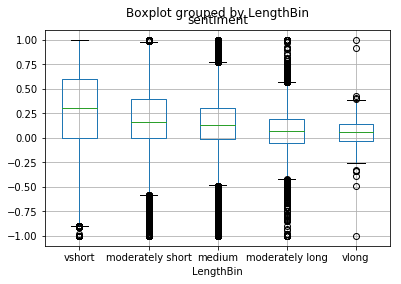

In [11]:
google_valid.boxplot('sentiment',by='LengthBin')